In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


In [ ]:
# Load Data
df = pd.read_csv('heart.csv')


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# Pisahkan Data Atribut dengan Label
X = df.drop(columns='target', axis=1)
Y = df['target']

In [ ]:
# Pisahkan Data Training dan Data Testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)



In [ ]:
# Membuat Model Training
model = GaussianNB()
model.fit(X_train, Y_train)

GaussianNB()

In [ ]:
# Evaluasi Model
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Akurasi data training:', training_data_accuracy)

Akurasi data training: 0.8390243902439024


In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Akurasi data testing:', test_data_accuracy)

Akurasi data testing: 0.7804878048780488


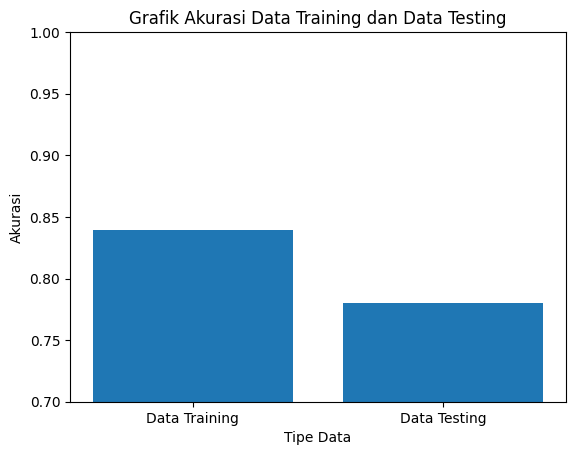

In [ ]:
# Membuat Grafik Akurasi
accuracy_list = [training_data_accuracy, test_data_accuracy]
accuracy_labels = ['Data Training', 'Data Testing']
plt.bar(accuracy_labels, accuracy_list)
plt.title('Grafik Akurasi Data Training dan Data Testing')
plt.xlabel('Tipe Data')
plt.ylabel('Akurasi')
plt.ylim([0.7, 1])
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Melakukan prediksi dengan cross validation
predictions = cross_val_predict(model, X, Y, cv=10)

# Menghitung nilai accuracy, precision, dan recall
accuracy = accuracy_score(Y, predictions)
micro_avg= precision_score(Y, predictions, average='micro')
weighted_avg = precision_score(Y, predictions, average='weighted')


# Membuat tabel metrics
import pandas as pd

table = pd.DataFrame({
    'Metrics': ['Accuracy', 'Micro Avg ', 'Weighted Avg '],
    'Value': [accuracy, micro_avg, weighted_avg]
})

print(table)


         Metrics     Value
0       Accuracy  0.821463
1     Micro Avg   0.821463
2  Weighted Avg   0.822502


In [ ]:
jumlah_pasien = len(df)
jumlah_pasien_terkena = len(df[df['target'] == 1])
jumlah_pasien_tidak_terkena = len(df[df['target'] == 0])

print("Jumlah pasien: ", jumlah_pasien)
print("Jumlah pasien terkena risiko penyakit jantung: ", jumlah_pasien_terkena)
print("Jumlah pasien tidak terkena risiko penyakit jantung: ", jumlah_pasien_tidak_terkena)


Jumlah pasien:  1025
Jumlah pasien terkena risiko penyakit jantung:  526
Jumlah pasien tidak terkena risiko penyakit jantung:  499


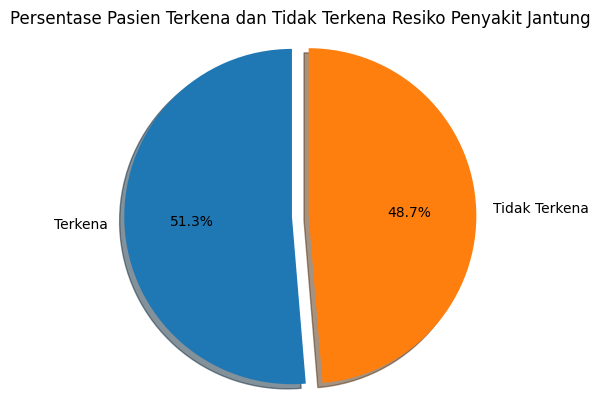

In [ ]:
# Pie Chart
labels = 'Terkena', 'Tidak Terkena'
sizes = [jumlah_pasien_terkena, jumlah_pasien_tidak_terkena]
explode = (0.1, 0)  # explode 1st slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.title('Persentase Pasien Terkena dan Tidak Terkena Resiko Penyakit Jantung')
plt.show()



In [ ]:
from sklearn.metrics import classification_report

# prediksi model Naive Bayes
y_pred = model.predict(X_test)

# mencari nilai recall, precision, dan F1-score
report = classification_report(Y_test, y_pred, output_dict=True)

# mencetak nilai recall, precision, dan F1-score
print("Recall:", report['weighted avg']['recall'])
print("Precision:", report['weighted avg']['precision'])
print("F1-score:", report['weighted avg']['f1-score'])

Recall: 0.7804878048780488
Precision: 0.7808962539386161
F1-score: 0.7802260133513678
